In [1]:
from __future__ import print_function
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from math import sqrt

In [2]:
def L(x):
    pt1 = np.any([np.abs(x)<1], axis=0)*2
    pt2 = np.logical_and(x >=1, x<=2)*(2-(x-1)**2)
    pt3 = np.logical_and(x >=-2, x<=-1)*(2-(x+1)**2)
    return pt1+pt2+pt3

In [3]:
def psi(r):
    pt1 = np.any([r == 0], axis=0)*1
    pt2 = np.logical_and(r > 0, r <= 1)*2/3
    pt3 = np.logical_and(r > 1, r < 2)*(1+np.sqrt(2-r))/3
    pt4 = np.any([r == 2], axis=0)*0
    return pt1+pt2+pt3+pt4
def rightboundary(r):
    if r==2:
        return 1
    elif r>=1:
        return 1+sqrt(2-r)
    elif r>0:
        return 2
    else:
        return 3

In [4]:
rs12 = np.linspace(0, 1, 50);
rs1, rs2 = rs12[0:1], rs12[1:];
rs3 = np.linspace(1, 2, 50);
rs3 = rs3[1:-1]
rs4 = np.array([2])
xs1 = np.linspace(-2,2,100);
xs2 = np.linspace(-3,-2,50, endpoint=False);
xs3 = np.linspace(2,3,50)[1:];
xs = np.concatenate((xs1, xs2, xs3))

def plot_r_and_L(thresh, fig=None, ax1=None, ax2=None):
    if fig is None:
        fig = plt.figure()
    if ax1 is None:
        ax1 = fig.add_subplot(2, 1, 1)
    line11 = ax1.plot(rs1, psi(rs1), 'b.')
    line12 = ax1.plot(rs2, psi(rs2), 'b')
    line13 = ax1.plot(rs3, psi(rs3), 'b')
    line14 = ax1.plot(rs4, psi(rs4), 'b.')
    ax1.set_title("$\psi(r)$");
    point1 = ax1.plot(thresh, psi(thresh), 'r.', markersize=20)
    if ax2 is None:
        ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(xs1, L(xs1), 'b');
    ax2.plot(xs2, L(xs2), 'b');
    ax2.plot(xs3, L(xs3), 'b');
    line2 = ax2.plot(xs, thresh*np.ones_like(xs), 'k')
    point2 = ax2.plot([-rightboundary(thresh), rightboundary(thresh)], [0,0], 'r.-')
    ax2.set_title("$L(x)$");
    return fig, ax1, ax2, point1, line2, point2


In [5]:
def f(r, fig, ax1, ax2, point1, line2, point2):
    point1.set_xdata(r)
    point1.set_ydata(psi(r))
    line2.set_ydata(r*np.ones_like(xs))
    point2.set_xdata([-rightboundary(r), rightboundary(r)])
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


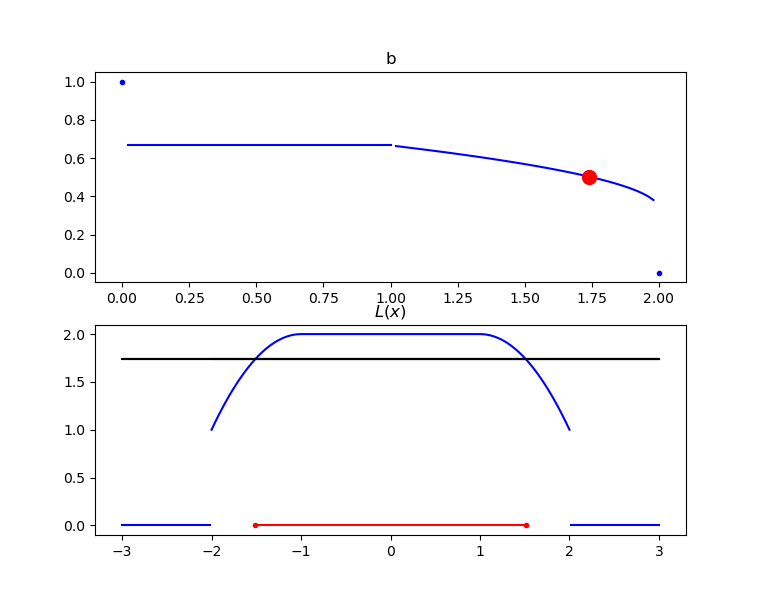

interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, step=0.02), Output()), _dom_classes=('w…

In [6]:
#fig1, ax1, point1 = plot_r(ax=None, rMarked=1.0)
#fig2, ax2, line2, point2 = plotL(fig = fig1, ax=None, thresh=1.0)
fig, ax1, ax2, point1, line2, point2 = plot_r_and_L(1.0)
interact(f, r=FloatSlider(min=0.0, max=2.0, step=0.02), fig=fixed(fig), ax1 = fixed(ax1), ax2 = fixed(ax2), point1=fixed(point1[0]), line2 = fixed(line2[0]), point2=fixed(point2[0]));



In [7]:
len(line2)

1

In [8]:
ax1


In [9]:
ax1.set_title("b")

Text(0.5, 1.0, 'b')